# Latar Belakang

Video youtube dapat dinikmati oleh seluruh manusia dengan gratis, menonton streaming lewat hp, laptop, playstation maupun tv sekarang sudah tersedia. Namun ada saja video
yang jumlah penontonnya sedikit dan ada yang sangat banyak. Dalam setiap video tersebut, penonton dapat memberi komentar, memberi tanda like/dislike pada video, dapat melihat
deskripsi dari video tersebut dan juga title yang diupload. Berdasarkan dari dataset yang didapat, banyak kriteria dari video tersebut yang jadi tontonan mulai dari science,
politik, berita, trailer dan masih banyak lagi.

# Permasalahan

Data statistik pada trending video youtube, terdapat banyak fitur fitur yang dapat digunakan bagi pengguna maupun pembuat video. Diantaranya ada tombol like/dislike, video
title, video id, deskripsi video tersebut dan banyak yang lain. 
Pada video yang telah diunggah kedalam youtube, diantaranya ada video yang tidak memberi deskripsi video tersebut dan permasalahan dalam itu yaitu pengguna tidak dapat mengerti
apa isi dari video tersebut melainkan dari title video.
Sebagai Data Analyst, saya akan mencoba untuk mengatasi masalah tersebut menggunakan dataset yang telah saya dapatkan:
Bagaimana caranya agar menarik perhatian dari pengguna youtube agar video yang akan ditonton lebih mudah dimengerti dengan adanya description.

In [77]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Dataset yang saya peroleh berisi tentang konten dan fitur dari semua trending video pada youtube (US only) ada 16 kolom pada dataset tersebut:

1.video_id = kode unik yang biasa terdapat setelah website youtube                                                                                                                     
2.trending_date = kapan video tersebut menjadi trending
3.title = judul dari video yang di unggah pada youtube
4.channel_title =
5.category_id = kategori dari video yang paling sering dicari di youtube
6.publish_time = kapan video tersebut diunggah dalam youtube
7.tags = tags adalah kata kunci deskriptif yang dapat ditambahkan ke video untuk membantu penonton menemukan konten
8.views = dapat mempertunjukkan jumlah orang yang telah menonton video youtube
9.likes = tombol pada youtube yang mengartikan penonton tersebut suka dengan konten yang dibuat
10.dislikes = tombol pada youtube yang mengartikan penonton tersebut tidak suka dengan konten yang dibuat
11.comment_count = dapat mempertunjukkan jumlah comment yang terdapat pada video youtube tersebut
12.thumbnail_link = hal pertama yang dilihat oleh pentonton saat menjelajahi saluran youtube
13.comments_disabled = fitur yang melarang pentonon untuk memberi komentar pada video youtube tersebut
14.ratings_disabled = fitur yang melarang pentonton untuk memberi rating pada video youtube tersebut
15.video_error_or_removed = video merupakan dihapus/error 
16.description = deskripsi dari isi konten youtube tersebut

# Berikut merupakan 5 baris teratas dan 5 baris terbawah dari dataset trending videos pada youtube (US only)

In [78]:
df=pd.read_csv('USvideos.csv')
display(df.head(),df.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\nPaulina Gregory\n\n\nShots Studios Channels:\nAle

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""|""kitten""|""kittens""|""prince michael""|""prince""|""michael""|""laser""|""olympics""|""red""|""dream""",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER BASED ON HER FEATURES: BTS! |bradmondo,Brad Mondo,24,2018-05-18T17:34:22.000Z,"I gave safiya nygaard a perfect hair makeover based on her features: bts|""brad mondo""|""safiya and tyler""|""safiya nygaard""|""hair transformation""|""makeover""|""I got a perfect makeover based on my features""|""bts""|""hairdresser reacts""|""before and after""|""hair""|""makeup""|""transformation""|""ANTM""|""what not to wear""|""the ideal haircut and color for your face""|""safiya buzzfeed""|""color for your skin tone""|""haircut for your face shape""|""tutorial""|""balayage""|""hair stylist""|""hair color""|""hair tutorial""",1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in this video! She was serving major lewks!SAFIYAS VIDEO▷https://goo.gl/C92AmbSHOP MY LIMITED EDITION HOODIE!▷ https://goo.gl/VN6tVD LET'S BE BFFS!INSTAGRAM ▷ https://www.instagram.com/bradmondonyc/TWITTER ▷ https://twitter.com/bradmondonycFACEBOOK ▷ https://www.facebook.com/bradmondonyc/WANNA SEE MORE OF MY FACE? ▷ https://goo.gl/QjHDAuWANNA SEE MY LAST VIDEO? ▷ https://goo.gl/exP6gWFILMING EQUIPMENT: UMBRELLA LIGHTS▷ http://amzn.to/2qNy9K4RING LIGHT▷ http://amzn.to/2Erv1p9CAMERA▷ http://amzn.to/2EsXQRYCAMERA LENS▷http://amzn.to/2DdlN0rTRIPOD▷ http://amzn.to/2mePXbDMIC▷ http://amzn.to/2Bpt9PHBACKGROUND PAPER▷http://amzn.to/2FkKKHXWANT AN INTRO LIKE MINE? CONTACT▷www.marcelsaleta.comDON'T FORGET TO LIVE YOUR EXTRA LIFE! 😁
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|""How It Should Have Ended""|""parody""|""comedy""|""entertainment""|""wakanda""|""Chadwick Boseman""|""Michael B Jordan""|""movies""|""animation""|""fortnite""|""azerrz""|""movie""|""plothole""|""review""|""childish gambino""|""donald glover""|""this is america""|""ending explained""",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More HISHEs: https://bit.ly/HISHEPlaylistSubscribe to HISHE: https://bit.ly/HISHEsubscribeTwitter @theHISHEdotcomhttps://twitter.com/TheHISHEdotcomInstagram @HISHEgramhttps://instagram.com/hishegram/Facebook:https://www.facebook.com/howitshouldhaveended/HISHE Swag:http://www.dftba.com/hisheSpecial Thanks to Guest Voices Azerzz https://www.youtube.com/user/HeyitzAzerrzNicholas Andrew Louie https://www.youtube.com/user/NicholasAndrewLouie--------------Previous Episodes--------------------Avengers Infinity War and Beyond (Toy Story Mashup)https://youtu.be/bvXxLp_G9w0How IT Should Have Endedhttps://youtu.be/gh0WvZtbATEVillain Pub - The Dead Poolhttps://youtu.be/3DGlk_JAm8UHow Justice League Should Have Endedhttps://youtu.be/zj_y8eAKpQUHow Star Wars The Last Jedi Should Have Endedhttps://youtu.be/rCB8DUGpYQQHow Thor Ragnarok Should Have Endedhttps://youtu.be/lPZRmkVLeOEHow Spider-Man Homecoming Should Have Endedhttps://youtu.be/hjuHNdEgN30Batman V Superman - Comedy Recaphttps://youtu.be/bNjhtHyihJ0How The Incredibles Should Have Endedhttps://youtu.be/C0VJaFN4bncVi

# Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita harus mengenali dan mengerti dataset kita lebih jauh dalam Data Understanding. Dari data ini kita akan tahu apa saja yang terdapat pada
dataset kita dan perlu ditangani dengan Data Cleaning.

Pertama mari kita lihat informasi dari jumlah baris dan kolom pada dataset kita dengan missing valuenya.

In [79]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (40949, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14

In [80]:
display(df.describe(), df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/
freq,30,200,30,203,50,1535,30,58


In [81]:
# Menentukan number of unique dari setiap kolom

pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   video_id                6351               
1   trending_date           205                
2   title                   6455               
3   channel_title           2207               
4   category_id             16                 
5   publish_time            6269               
6   tags                    6055               
7   views                   40478              
8   likes                   29850              
9   dislikes                8516               
10  comment_count           13773              
11  thumbnail_link          6352               
12  comments_disabled       2                  
13  ratings_disabled        2                  
14  video_error_or_removed  2                  
15  description             6901               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [82]:
# Jumlah missing value yang terdapat pada dataset

df.isna().sum()

video_id                  0  
trending_date             0  
title                     0  
channel_title             0  
category_id               0  
publish_time              0  
tags                      0  
views                     0  
likes                     0  
dislikes                  0  
comment_count             0  
thumbnail_link            0  
comments_disabled         0  
ratings_disabled          0  
video_error_or_removed    0  
description               570
dtype: int64

In [83]:
# Presentasi dari missing value yang terdapat pada dataset

df.isna().sum()/df.shape[0]*100

video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

<AxesSubplot: >

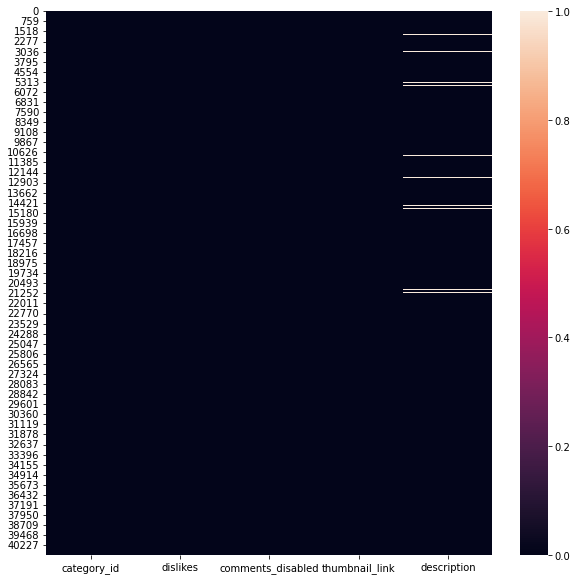

In [84]:
# Sebaran missing value di dalam data

plt.figure(figsize=(10,10))
sns.heatmap(df[['category_id','dislikes','comments_disabled','thumbnail_link','description']].isna())

# Pada umumnya kita dapat melihat bahwa dataset kita memiliki 16 kolom dengan 40494 baris.
# Missing value tersebut dapat memiliki dampak dari category_id, dislikes, comments_disabled atau thumbnail_link.
# Misiing value hanya terdapat pada kolom Description sebesar 570 value

# Cara untuk mengatasi Missing value:
1. Menghapus baris/kolom yang berisi missing value.
2. Mengisi data yang hilang dengan hasil yang relevan dengan data tersebut.

In [85]:
# Melihat keterkaitan dari 'category_id' dan 'dislikes' yang mempengaruhi missing value

display(df[df['description'].isna()]['category_id'].value_counts(),
df[df['description'].isna()]['dislikes'].value_counts())

22    149
24    145
25    78 
17    49 
28    40 
10    35 
23    22 
27    14 
20    14 
26    6  
2     5  
1     5  
15    4  
29    4  
Name: category_id, dtype: int64

1       23
0       22
2       14
3       11
5       9 
       .. 
2582    1 
4588    1 
2479    1 
2908    1 
382     1 
Name: dislikes, Length: 376, dtype: int64

In [86]:
# Melihat keterkaitan dari 'comments_disabled' dan 'thumbnail_link' yang mempengaruhi missing value

display(df[df['description'].isna()]['comments_disabled'].value_counts(),
df[df['description'].isna()]['thumbnail_link'].value_counts())

False    541
True     29 
Name: comments_disabled, dtype: int64

https://i.ytimg.com/vi/vjSohj-Iclc/default.jpg    28
https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg    25
https://i.ytimg.com/vi/zxwfDlhJIpw/default.jpg    23
https://i.ytimg.com/vi/rwFfo61fVSY/default.jpg    15
https://i.ytimg.com/vi/9yDNAc8YS9c/default.jpg    13
                                                  ..
https://i.ytimg.com/vi/mdyegeGkdL4/default.jpg    1 
https://i.ytimg.com/vi/tclPO3kOlfM/default.jpg    1 
https://i.ytimg.com/vi/3Sa8G-VR13Q/default.jpg    1 
https://i.ytimg.com/vi/nWC0PkHB8O4/default.jpg    1 
https://i.ytimg.com/vi/HnYKhetlm3s/default.jpg    1 
Name: thumbnail_link, Length: 103, dtype: int64

In [87]:
index_nan=df.loc[df['description'].isna()].index

In [88]:
df['description']=df.groupby('dislikes')['description'].apply(lambda x: x.fillna(x.describe(include='object')['top']))

In [89]:
df.loc[index_nan]['description'].value_counts()

Jim Nabors, who created one of TV’s beloved comedic characters, Gomer Pyle, died in Hawaii at the age of 87.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [95]:
df[['description']].isna().sum()

description    56
dtype: int64

In [91]:
df[df['description'].isna()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
2800,THr_seahKUI,17.28.11,2017 Christmas Decorations at the White House,The White House,25,2017-11-27T14:17:59.000Z,[none],249943,8353,5345,4437,https://i.ytimg.com/vi/THr_seahKUI/default.jpg,False,False,False,NaN
3234,THr_seahKUI,17.30.11,2017 Christmas Decorations at the White House,The White House,25,2017-11-27T14:17:59.000Z,[none],1341741,28749,21754,18035,https://i.ytimg.com/vi/THr_seahKUI/default.jpg,False,False,False,NaN
3473,THr_seahKUI,17.01.12,2017 Christmas Decorations at the White House,The White House,25,2017-11-27T14:17:59.000Z,[none],1544644,30594,22590,18555,https://i.ytimg.com/vi/THr_seahKUI/default.jpg,False,False,False,NaN
3708,THr_seahKUI,17.02.12,2017 Christmas Decorations at the White House,The White House,25,2017-11-27T14:17:59.000Z,[none],1747311,31966,23187,18444,https://i.ytimg.com/vi/THr_seahKUI/default.jpg,False,False,False,NaN
3933,THr_seahKUI,17.03.12,2017 Christmas Decorations at the White House,The White House,25,2017-11-27T14:17:59.000Z,[none],1958265,33151,23744,18700,https://i.ytimg.com/vi/THr_seahKUI/default.jpg,False,False,False,NaN
4152,THr_seahKUI,17.04.12,2017 Christmas Decorations at the White House,The White House,25,2017-11-27T14:17:59.000Z,[none],2118097,34016,24186,19071,https://i.ytimg.com/vi/THr_seahKUI/default.jpg,False,False,False,NaN
4598,THr_seahKUI,17.06.12,2017 Christmas Decorations at the White House,The White House,25,2017-11-27T14:17:59.000Z,[none],2304379,35108,24731,19012,https://i.ytimg.com/vi/THr_seahKUI/default.jpg,False,False,False,NaN
10000,QwZT7T-TXT0,18.03.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""parrot""|""maverick""|""bird""|""maverick clothes""|""logan paul apology""|""suicide forest""|""japanese suicide forest""|""suicide""|""logan paul suicide""|""suicide apology""",13305605,835378,629120,733373,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
10202,QwZT7T-TXT0,18.04.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""parrot""|""maverick""|""bird""|""maverick clothes""|""logan paul apology""|""suicide forest""|""japanese suicide forest""|""suicide""|""logan paul suicide""|""suicide apology""",23389090,1082422,1065772,1059651,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
10415,QwZT7T-TXT0,18.05.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""parrot""|""maverick""|""bird""|""maverick clothes""|""logan paul apology""|""suicide forest""|""japanese suicide forest""|""suicide""|""logan paul suicide""|""suicide apology""",28407744,1204072,1278887,1238817,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN


# Dapat dilihat bahwa missing value pada kolom description telah menjadi 56 dari 570 (<10%)

In [92]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(40949, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,video_id,object,0,6351,"[5n9xafjynJA, nkXGohB02V0]"
1,trending_date,object,0,205,"[18.10.06, 17.28.11]"
2,title,object,0,6455,"[björk: utopia, Count On Christmas Performance ft. Bebe Rexha | A CHRISTMAS STORY LIVE]"
3,channel_title,object,0,2207,"[Mountain Dew, Austin Burk]"
4,category_id,int64,0,16,"[23, 1]"
5,publish_time,object,0,6269,"[2017-11-21T16:16:11.000Z, 2018-01-18T05:34:41.000Z]"
6,tags,object,0,6055,"[karlie kloss|""victoria's secret fashion show""|""vs""|""victoria's secret""|""klossy""|""karlie""|""kloss""|""vs fashion show 2017""|""victoria's secret fashion show 2017""|""shanghai""|""china""|""angel candice""|""candice swanepoel""|""bella hadid""|""alessandra ambrosio""|""alessandra""|""sanne vloet""|""elsa hosk""|""romee""|""romee strijd""|""fantasy bra""|""ed razek""|""pink""|""annalora""|""annalora von pentz""|""katie cali""|""adriana lima""|""vs angels""|""vsfs""|""vsfs 2017""|""sara sampaio""|""lil aldridge""|""lily aldridge""|""cindy bruna""|""ming xi""|""liu wen"", rick and morty|""dan harmon""|""rick and morty 2018""|""rick and morty funny""|""rick and morty gq""|""dan harmon interview""|""dan harmon rick and morty""|""dan harmon 2018""|""dan harmon gq""|""dan harmon rant""|""dan harmon writing""|""rick and morty season""|""rick and morty episode""|""rick and morty theories""|""rick and morty conspiracy""|""season 3 rick and morty""|""pickle rick""|""dan harmon pickle rick""|""fan theories""|""rick and morty fan theories""|""rick""|""morty""|""gq""|""gq magazine""]"
7,views,int64,0,40478,"[1093335, 58231]"
8,likes,int64,0,29850,"[56843, 65603]"
9,dislikes,int64,0,8516,"[6606, 22383]"


# Data Analysis

Setelah selesai kita cleaning data, kita akan melakukan analysis untuk mencari tahu penonton yang dislike video berdasarkan tidak adanya deskripsi video

In [93]:
df['description'].value_counts()

► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [94]:
df_ct=pd.crosstab(df['description'],df['dislikes'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values(1,ascending=False).head(10)

dislikes,0,1,2,3,4,5,6,7,8,9,...,487820,497847,884944,1127798,1353647,1470383,1545015,1602383,1643059,Total
description,,,,,,,,,,,,,,,,,,,,,
"Jim Nabors, who created one of TV’s beloved comedic characters, Gomer Pyle, died in Hawaii at the age of 87.",0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
"While talking about his role as Elio in Call Me by Your Name, Timothée Chalamet discusses his relationship with Madonna's daughter Lola, and a night out dancing when he first met SiriusXM host Andy Cohen. \n\nSubscribe to SiriusXM on Youtube: http://www.youtube.com/siriusxm\n\nConnect with SiriusXM Online\nFacebook: http://www.facebook.com/siriusxm\nTwitter: http://www.twitter.com/siriusxm\nInstagram: http://www.instagram.com/siriusxm\nGoogle+: http://www.google.com/+siriusxm\n\nYou can hear entire episodes of SiriusXM programming on SiriusXM On Demand. For more information and a free trial go to: http://www.siriusxm.com/ondemand",0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
"While shark finning is illegal in U.S. waters, shark fins – including imports from countries that allow finning – continue to be bought and sold throughout the U.S. The demand for shark fins is one of the greatest threats facing shark populations around the world.\n\nThose interested in learning about the campaign can visit www.oceana.org/SaveSharks for additional information.",0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
"Daisy Ridley, Oscar Isaac, Gwendoline Christie and more share their take on the late actress' final performance with the epic franchise.\n\nFull Story: http://www.eonline.com/news/898072/mark-hamill-and-the-star-wars-last-jedi-cast-reflect-on-carrie-fisher-s-emotional-final-performance\n\nSubscribe: http://eonli.ne/RedCarpetSubscribe\n\nAbout E! Live from the Red Carpet:\nWho’s wearing what? Who’s dating who? We’re here to find out. Join E! Live from the Red Carpet at the Oscars, the Grammys, the Golden Globes, and more. Our correspondents are on the Red Carpet, ready to get the scoop from your favorite stars, musicians and personalities. Whether at a glamorous awards show, or the premiere of your favorite TV series, E! Live from the Red Carpet is the go to source for the latest beauty trends, the hottest red carpet fashion and exclusive celebrity interviews.\n\nConnect with E! Live from the Red Carpet and E! News:\nVisit the E! News WEBSITE: http://eonli.ne/enews\nFollow E! Live from the Red Carpet on TWITTER: http://eonli.ne/RedCarpetTwitter\nFollow E! News on TWITTER: http://eonli.ne/ENewsTW\nLike E! News on FACEBOOK: http://eonli.ne/ENewsFB\nCheck out E! News on INSTAGRAM: http://eonli.ne/ENewsIG\n\nStar Wars: The Last Jedi Cast on Carrie Fisher's Final Performance | E! Live from the Red Carpet\nhttps://www.youtube.com/channel/UCD-1jAmL42qnEszozefaa1g",0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
What does victory taste like? It's a free Bloomin' Onion if the SEC wins or Coconut Shrimp if the Big 10 wins the Outback Bowl. Watch the Outback Bowl on January 1st and taste your winning offer the next day on January 2nd.,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
"Apple is reportedly buying music recognition app Shazam, a move that could allow it to integrate an important feature into its line of smartphones at a time when the iPhone's innovation crown is under threat from Google and Samsung.",0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
An amusement park in Denmark has a ride where you free fall backwards from 131 feet up.\n\nThe INSIDER team believes that life is an adventure! Subscribe to our channel and visit us at: https://thisisinsider.com\nINSIDER on Facebook: https://www.facebook.com/thisisinsider/\nINSIDER on Instagram: https://www.instagram.com/thisisinsider/\nINSIDER on Twitter: https://twitter.com/thisisinsider,0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
"Somehow I always end up with circuit boards all over my desk and no enclosure to put them in. This is a simple nichrome wire bending machine that you can make on the super-cheap. Of c

# Kesimpulan 

Dari analisis yang dilakukan, kita dapat membuat kesimpulan bahwa:
1. Banyak penonton memberi dislike pada video tanpa deskripsi 
2. Tidak semua penonton memberi dislike pada video tanpa deskripsi
3. Hanya video tanpa deskripsi yang memiliki missing value dari dataset trending video dalam youtube

# Rekomendasi

1. Pihak youtube harus mewajibkan pengunggah untuk memberi deskripsi atas video unggahannya
2. Memberi tag pada video dengan jelas agar gampang dicari oleh penonton
3. Memasang thumbnail yang menggoda agar penonton ingin membuka video tersebut